# 모델 저장

-   학습한 모델을 저장장치에 파일로 저장하고 나중에 불러와 사용(추가 학습, 예측 서비스) 할 수 있도록 한다.
-   파이토치는 **모델의 파라미터만 저장**하는 방법과 **모델 구조와 파라미터 모두를 저장**하는 두가지 방식을 제공한다.
-   저장 함수
    -   `torch.save(저장할 객체, 저장경로)`
-   보통 저장파일의 확장자는 `pt`나 `pth` 를 지정한다.

## 모델 전체 저장하기 및 불러오기

-   저장하기
    -   `torch.save(model, 저장경로)`
-   불러오기
    -   `load_model = torch.load(저장경로)`
-   저장시 **pickle**을 이용해 직렬화하기 때문에 불어오는 실행환경에도 모델을 저장할 때 사용한 클래스가 있어야 한다.


## 모델의 파라미터만 저장

-   모델을 구성하는 파라미터만 저장한다.
-   모델의 구조는 저장하지 않기 때문에 불러올 때 **모델을 먼저 생성하고 생성한 모델에 불러온 파라미터를 덮어씌운다.**
-   모델의 파라미터는 **state_dict** 형식으로 저장한다.

### state_dict

-   모델의 파라미터 Tensor들을 레이어 단위별로 나누어 저장한 Ordered Dictionary (OrderedDict)
-   `모델객체.state_dict()` 메소드를 이용해 조회한다.
-   모델의 state_dict을 조회 후 저장한다.
    -   `torch.save(model.state_dict(), "저장경로")`
-   생성된 모델에 읽어온 state_dict를 덮어씌운다.
    -   `new_model.load_state_dict(torch.load("state_dict저장경로"))`


## Checkpoint를 저장 및 불러오기

-   학습이 끝나지 않은 모델을 저장 후 나중에 이어서 학습시킬 경우에는 모델의 구조, 파라미터 뿐만 아니라 optimizer, loss 함수등 학습에 필요한 객체들을 저장해야 한다.
-   Dictionary에 저장하려는 값들을 key-value 쌍으로 저장후 `torch.save()`를 이용해 저장한다.

```python
# 저장
torch.save({
    'epoch':epoch,
    'model_state_dict':model.state_dict(),
    'optimizer_state_dict':optimizer.state_dict(),
    'loss':train_loss
}, "저장경로")

# 불러오기
model = MyModel()
optimizer = optim.Adam(model.parameter())

# loading된 checkpoint 값 이용해 이전 학습상태 복원
checkpoint = torch.load("저장경로")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
```


In [3]:
#  Linear의 파라미터(weight, bias) 개수: 입력feature * 출력feature + 출력feature
# (784, 128) 784 * 128 + 128
import torch
import torch.nn as nn
class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(3, 4) # 3 X 4 + 4 
        self.lr2 = nn.Linear(4, 2)
        self.relu = nn.ReLU() # activation함수->파라미터가 없는 단순 계산함수. relu(X) = max(X, 0)
    def forward(self, X):
        X = self.lr1(X)
        X = self.relu(X)
        X = self.lr2(X)
        return X

In [4]:
model = MyModel()
model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [5]:
import os
os.makedirs("saved_models", exist_ok=True)

In [6]:
# 모델을 저장
torch.save(model, "saved_models/my_model.pt")

In [8]:
## 저장된 모델 Load
load_model = torch.load("saved_models/my_model.pt")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7712\197926485.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model = torch.load("saved_models/my_model.pt")


In [9]:
load_model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [10]:
## 모델에 Layer들을 조회. 모델.instance변수명
lr_layer = model.lr1
lr_layer

Linear(in_features=3, out_features=4, bias=True)

In [11]:
## Layer에서 weight/bias 조회.  layer.weight, layer.bias
lr1_weight = lr_layer.weight
lr1_bias = lr_layer.bias

In [12]:
lr1_weight

Parameter containing:
tensor([[ 0.0288, -0.5614, -0.4909],
        [-0.3311, -0.3771,  0.4307],
        [ 0.3548, -0.5195, -0.1379],
        [-0.5446, -0.1220,  0.5561]], requires_grad=True)

In [13]:
lr1_bias

Parameter containing:
tensor([-0.4172,  0.0534, -0.5352,  0.1600], requires_grad=True)

In [14]:
load_model.lr1.weight

Parameter containing:
tensor([[ 0.0288, -0.5614, -0.4909],
        [-0.3311, -0.3771,  0.4307],
        [ 0.3548, -0.5195, -0.1379],
        [-0.5446, -0.1220,  0.5561]], requires_grad=True)

In [15]:
load_model.lr1.bias

Parameter containing:
tensor([-0.4172,  0.0534, -0.5352,  0.1600], requires_grad=True)

In [18]:
####### 파라미터들(weight들, bias들)만 저장/불러기기
# state_dict
state_dict = model.state_dict()  # 타입: collections.OrderedDict   - [(key, value), (key, value), ..]
state_dict

OrderedDict([('lr1.weight',
              tensor([[ 0.0288, -0.5614, -0.4909],
                      [-0.3311, -0.3771,  0.4307],
                      [ 0.3548, -0.5195, -0.1379],
                      [-0.5446, -0.1220,  0.5561]])),
             ('lr1.bias', tensor([-0.4172,  0.0534, -0.5352,  0.1600])),
             ('lr2.weight',
              tensor([[-0.1050,  0.2449,  0.0083, -0.4915],
                      [-0.0403,  0.3696,  0.2914,  0.3962]])),
             ('lr2.bias', tensor([-0.1641,  0.3765]))])

In [19]:
state_dict.keys()

odict_keys(['lr1.weight', 'lr1.bias', 'lr2.weight', 'lr2.bias'])

In [20]:
# 저장
torch.save(state_dict, "saved_models/my_model_parameter.pt")

In [23]:
sd = torch.load("saved_models/my_model_parameter.pt")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7712\3810450207.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd = torch.load("saved_models/my_model_parameter.pt")


In [25]:
# 모델 객체를 생성 -> load한 state_dict를 모델 파라미터에 덮어쓴다.
new_model = MyModel()
new_model.state_dict()

OrderedDict([('lr1.weight',
              tensor([[ 0.5148,  0.4099, -0.2973],
                      [-0.1596, -0.4820, -0.2951],
                      [-0.2226,  0.4307,  0.0505],
                      [-0.4605,  0.2338,  0.2596]])),
             ('lr1.bias', tensor([ 0.5370, -0.4554, -0.0964, -0.1462])),
             ('lr2.weight',
              tensor([[-0.3830, -0.4005,  0.3755,  0.1092],
                      [ 0.4894, -0.1427, -0.2676, -0.3616]])),
             ('lr2.bias', tensor([-0.0450, -0.3085]))])

In [26]:
new_model.load_state_dict(sd)

<All keys matched successfully>

In [27]:
new_model.state_dict()

OrderedDict([('lr1.weight',
              tensor([[ 0.0288, -0.5614, -0.4909],
                      [-0.3311, -0.3771,  0.4307],
                      [ 0.3548, -0.5195, -0.1379],
                      [-0.5446, -0.1220,  0.5561]])),
             ('lr1.bias', tensor([-0.4172,  0.0534, -0.5352,  0.1600])),
             ('lr2.weight',
              tensor([[-0.1050,  0.2449,  0.0083, -0.4915],
                      [-0.0403,  0.3696,  0.2914,  0.3962]])),
             ('lr2.bias', tensor([-0.1641,  0.3765]))])

In [28]:
# 파이토치 모델 구조를 조사해주는 패키지.
!pip install torchinfo

In [29]:
model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [30]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
MyModel                                  --
├─Linear: 1-1                            16
├─Linear: 1-2                            10
├─ReLU: 1-3                              --
Total params: 26
Trainable params: 26
Non-trainable params: 0

In [31]:
summary(model, (100, 3))  #(model, (input data의 shape))  (100:batch_size, 3: feature수)

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [100, 2]                  --
├─Linear: 1-1                            [100, 4]                  16
├─ReLU: 1-2                              [100, 4]                  --
├─Linear: 1-3                            [100, 2]                  10
Total params: 26
Trainable params: 26
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

# 문제 유형별 MLP 네트워크
- 해결하려는 문제 유형에 따라 출력 Layer의 구조가 바뀐다.
- 딥러닝 구조에서 **Feature를 추출하는 Layer 들을 Backbone** 이라고 하고 **추론하는 Layer들을 Head** 라고 한다. 


> - MLP(Multi Layer Perceptron), DNN(Deep Neural Network), ANN(Artificial Neural Network)
>     -   Fully Connected Layer(nn.Linear)로 구성된 딥러닝 모델
>     -   input feature들 모두에 대응하는 weight들(가중치)을 사용한다.
> 

## Regression(회귀)

### Boston Housing Dataset

보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.

-   CRIM: 범죄율
-   ZN: 25,000 평방피트당 주거지역 비율
-   INDUS: 비소매 상업지구 비율
-   CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
-   NOX: 일산화질소 농도(단위: 0.1ppm)
-   RM: 주택당 방의 수
-   AGE: 1940년 이전에 건설된 주택의 비율
-   DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
-   RAD: 고속도로 접근성
-   TAX: 재산세율
-   PTRATIO: 학생/교사 비율
-   B: 흑인 비율
-   LSTAT: 하위 계층 비율
    <br><br>
-   **Target**
    -   MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchinfo import summary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# 1. Dataset 준비
## 데이터 불러오기 -> 전처리 -> Dataset -> DataLoader
df = pd.read_csv("data/boston_hosing.csv")
df.shape

(506, 14)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
## X, y
X_boston = df.drop(columns='MEDV').values
y_boston = df['MEDV'].values
y_boston = y_boston.reshape(-1, 1)
X_boston.shape, y_boston.shape

((506, 13), (506, 1))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=0)

In [6]:
# 딥러닝 모델 -> 선형회귀기반: 전처리 - 연속형: Feature scaling, 범주형: One Hot Encoding
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
## Dataset
trainset = TensorDataset(
    torch.tensor(X_train_scaled, dtype=torch.float32),
    torch.tensor(y_train, dtype=torch.float32)
)
testset = TensorDataset(
    torch.tensor(X_test_scaled, dtype=torch.float32),
    torch.tensor(y_test, dtype=torch.float32)
)
len(trainset), len(testset)

(404, 102)

In [8]:
## DataLoader
train_loader = DataLoader(trainset, batch_size=404, shuffle=True)
test_loader = DataLoader(testset, batch_size=102)
len(train_loader), len(test_loader)

(1, 1)

In [9]:
##################### 모델 정의
# nn.Module 상속. 
# __init__(): layer 객체들 초기화, forward(): 추론 계산과정을 정의
class BostonHousingModeling(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(13, 16)
        self.lr2 = nn.Linear(16, 8)
        self.lr3 = nn.Linear(8, 1)  # 최종 출력결과(집값 중위수 1개).
        self.relu = nn.ReLU() # activation 함수.
    
    def forward(self, X):
        X = self.lr1(X)
        X = self.relu(X)
        X = self.lr2(X)
        X = self.relu(X)
        output = self.lr3(X) 
        return output
        # 출력 layer(output)은 activation 함수를 통과시키지 않음
        # 값의 범위가 정해져 있고 그 범위의 값을 반환하는 함수가 있을 경우는 사용할 수 있다.
        ##  출력값 범위: 0 ~ 1 실수 - logistic(sigmoid), -1 ~ 1 사이 실수: tanh 함수
        

In [10]:
# !pip install torchinfo

In [11]:
## 모델 객체 생성
boston_model = BostonHousingModeling().to(device)
summary(boston_model, (404, 13), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
BostonHousingModeling                    [404, 1]                  --
├─Linear: 1-1                            [404, 16]                 224
├─ReLU: 1-2                              [404, 16]                 --
├─Linear: 1-3                            [404, 8]                  136
├─ReLU: 1-4                              [404, 8]                  --
├─Linear: 1-5                            [404, 1]                  9
Total params: 369
Trainable params: 369
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.15
Input size (MB): 0.02
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.10

In [12]:
### 학습: loss_fn(회귀: nn.MSELoss, nn.functional.mse_loss), optimizer
epochs = 1000
lr = 0.001

optimizer = optim.Adam(boston_model.parameters(), lr=lr)
loss_fn = nn.MSELoss() # 회귀: Mean Squared Error

In [17]:
####### Train + Evaluation(에폭당)
import time
train_losses = []
valid_losses = []

s = time.time()
for epoch in range(epochs):  # tqdm 라이브러리
    #######################################
    # Train
    #######################################
    # 1. 모델을 train 모드로 변경
    boston_model.train()
    train_loss = 0.0
    # 2. Batch 단위로 학습 - 반복문.
    for X_train, y_train in train_loader:
        # 3. X, y를 device로 이동.
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 4. 추론
        pred = boston_model(X_train) # model.forward(X_train)
        # 5. loss(오차) 계산
        loss = loss_fn(pred, y_train)  # (추론한값,  정답)
        # 6. 파라미터들의 gradient 계산
        loss.backward()
        # 7. 파라미터들 업데이트
        optimizer.step()
        # 8. gradient 초기화
        optimizer.zero_grad()
        ## 로그용 - LOSS 저장
        train_loss += loss.item()
    train_loss /= len(train_loader) # train loss의 step별 평균을 계산 -> 한 epoch의 train loss

    #######################################
    # Evaluation
    #######################################
    # 1. eval 모드
    boston_model.eval()
    valid_loss = 0.0
    # 2. gradient function 구하지 않도록 처리
    with torch.no_grad():
        for X_valid, y_valid in test_loader: #step 단위로 평가
            # 3. X, y를 device로 이동
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            # 4. 추론
            pred_valid = boston_model(X_valid)
            # 5. 검증(평가) - MSE
            loss_valid = loss_fn(pred_valid, y_valid)
            valid_loss += loss_valid.item()
            
        valid_loss /= len(test_loader) # 평균계산.

    ## loss 계산한 것들을 list에 추가. 로그 출력
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f"[{epoch+1:04d}/{epochs}] - train loss: {train_loss}, valid loss: {valid_loss}")

e = time.time()
print("총학습에 걸린시간(초):", (e-s))

[0001/1000] - train loss: 5.8652024269104, valid loss: 20.69140625
[0002/1000] - train loss: 5.864312648773193, valid loss: 20.690576553344727
[0003/1000] - train loss: 5.8633832931518555, valid loss: 20.688541412353516
[0004/1000] - train loss: 5.862579822540283, valid loss: 20.68645477294922
[0005/1000] - train loss: 5.861699104309082, valid loss: 20.685436248779297
[0006/1000] - train loss: 5.860905170440674, valid loss: 20.684335708618164
[0007/1000] - train loss: 5.860044479370117, valid loss: 20.683792114257812
[0008/1000] - train loss: 5.859119415283203, valid loss: 20.684345245361328
[0009/1000] - train loss: 5.858149528503418, valid loss: 20.684534072875977
[0010/1000] - train loss: 5.857292175292969, valid loss: 20.683368682861328
[0011/1000] - train loss: 5.856560707092285, valid loss: 20.68179702758789
[0012/1000] - train loss: 5.855687141418457, valid loss: 20.681018829345703
[0013/1000] - train loss: 5.854743003845215, valid loss: 20.680683135986328
[0014/1000] - train lo

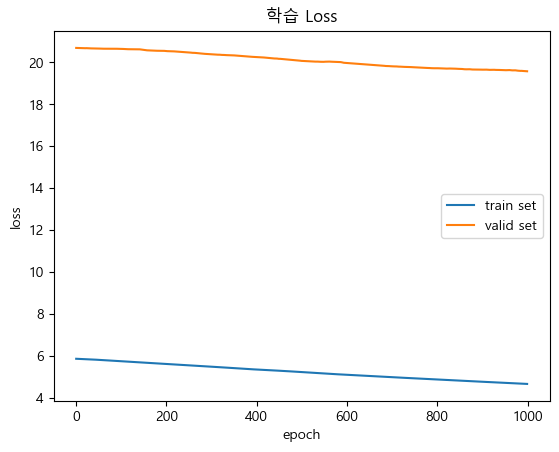

In [18]:
# loss 시각화
plt.plot(range(epochs), train_losses, label="train set")
plt.plot(range(epochs), valid_losses, label="valid set")
plt.title("학습 Loss")
# plt.ylim(10, 50)
# plt.xlim(800, 1000)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [19]:
# 최종 모델 저장.
save_path = "saved_models/boston_model.pth"
torch.save(boston_model, save_path)

In [20]:
model = torch.load(save_path)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_18056\1837872702.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(save_path)


In [21]:
summary(model, (10, 13))

Layer (type:depth-idx)                   Output Shape              Param #
BostonHousingModeling                    [10, 1]                   --
├─Linear: 1-1                            [10, 16]                  224
├─ReLU: 1-2                              [10, 16]                  --
├─Linear: 1-3                            [10, 8]                   136
├─ReLU: 1-4                              [10, 8]                   --
├─Linear: 1-5                            [10, 1]                   9
Total params: 369
Trainable params: 369
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [27]:
testset[10]

(tensor([ 8.6305, -0.4996,  0.9989, -0.2729,  1.0700, -0.4969,  1.1033, -0.9469,
          1.6874,  1.5421,  0.7927, -3.8659,  1.0856]),
 tensor([8.8000]))

In [25]:
# application에서 새로운 데이터 추론.
new_data = testset[10][0]
new_data = new_data.reshape(1, -1)
new_data.shape

torch.Size([1, 13])

In [28]:
# 추론
model = model.to(device)
model.eval()
with torch.no_grad():
    y_pred = model(new_data)
    print("예상집값:", y_pred.item())

예상집값: 9.359225273132324


## 분류 (Classification)

### Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋.
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

- **Feature**이미지는 28x28 크기이며 Gray scale이다.
- **Target**은 총 10개의 class로 구성되어 있으며 각 class의 class 이름은 다음과 같다.

| 레이블 | 클래스       |
|--------|--------------|
| 0      | T-shirt/top |
| 1      | Trousers    |
| 2      | Pullover    |
| 3      | Dress       |
| 4      | Coat        |
| 5      | Sandal      |
| 6      | Shirt       |
| 7      | Sneaker     |
| 8      | Bag         |
| 9      | Ankle boot  |

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import torch.optim as optim

from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

from torchinfo import summary
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [2]:
# Dataset load ---> 확인용
data_root = "datasets/fashin_mnist"
trainset = FashionMNIST(root=data_root, train=True, download=True)
testset = FashionMNIST(root=data_root, train=False, download=True)

100%|█████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:09<00:00, 2.66MB/s]


Extracting datasets/fashin_mnist\FashionMNIST\raw\train-images-idx3-ubyte.gz to datasets/fashin_mnist\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 106kB/s]


Extracting datasets/fashin_mnist\FashionMNIST\raw\train-labels-idx1-ubyte.gz to datasets/fashin_mnist\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:02<00:00, 1.76MB/s]


Extracting datasets/fashin_mnist\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to datasets/fashin_mnist\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting datasets/fashin_mnist\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to datasets/fashin_mnist\FashionMNIST\raw



In [5]:
# train을 trainset/validset을 나누기
trainset, validset = random_split(trainset, [50000, 10000])

In [6]:
len(trainset), len(validset), len(testset)

(50000, 10000, 10000)

In [8]:
### class들 확인
testset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
testset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

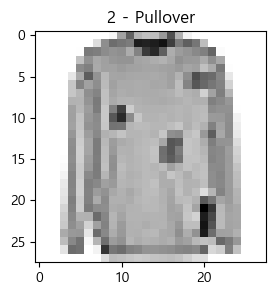

In [17]:
# input 이미지 확인
idx = 1250
x, y = testset[idx]
# x, y
plt.figure(figsize=(3, 3))
# plt.imshow(x, cmap='gray') # gray: 0(최소값):black , 255(최대값): white
plt.imshow(x, cmap='Greys') # Greys: 0:white, 255: black
plt.title(f"{y} - {testset.classes[y]}")
plt.show()

In [18]:
x

In [20]:
# Dataset load 
## transform 지정: 전처리 로직추가. 
data_root = "datasets/fashin_mnist"
trainset = FashionMNIST(root=data_root, train=True, download=True, transform=ToTensor())
testset = FashionMNIST(root=data_root, train=False, download=True, transform=ToTensor())
trainset, validset = random_split(trainset, [50000, 10000])

In [22]:
# DataLoader 생성
train_loader = DataLoader(trainset, batch_size=256, shuffle=True, drop_last=True)
valid_loader = DataLoader(validset, batch_size=256)
test_loader = DataLoader(testset, batch_size=256)

In [24]:
len(train_loader), len(valid_loader),len(test_loader), trainset[0][0].shape

(195, 40, 40, torch.Size([1, 28, 28]))

In [37]:
### 모델 클래스 구현
class FashionMNISTModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(784, 1024) #첫번째 linear - in_features=입력 feature객수(1 * 28 * 28)
        self.lr2 = nn.Linear(1024, 512)
        self.lr3 = nn.Linear(512, 256)
        self.lr4 = nn.Linear(256, 128)
        self.lr5 = nn.Linear(128, 64)
        self.lr6 = nn.Linear(64, 10)  # 마지막 Linear - out_features=출력 결과개수(다중분류: class개수) => 클래스별 정답일 확률(을 계산할 때 사용할 값)
        # hidden layer에 적용할 activation 함수
        self.relu = nn.ReLU()
    
    def forward(self, X):
        # X=torch.flatten(X, start_dim=1)  # (256, 1, 28, 28) -> 256 * 1 * 28 * 28, start_dim=1 -> (256, 1 x 28 x 28)
        X = nn.Flatten()(X) # start_dim=1 해서 flatten 처리를 하는 Layer클래스.
        X = self.lr1(X)
        X = self.relu(X)
        
        X = self.lr2(X)
        X = self.relu(X)

        X = self.lr3(X)
        X = self.relu(X)

        X = self.lr4(X)
        X = self.relu(X)

        X = self.lr5(X)
        X = self.relu(X)

        output = self.lr6(X) # output
        return output

In [38]:
# 모델 구조 확인
## 모델 생성
f_model = FashionMNISTModel().to(device)
f_model

FashionMNISTModel(
  (lr1): Linear(in_features=784, out_features=1024, bias=True)
  (lr2): Linear(in_features=1024, out_features=512, bias=True)
  (lr3): Linear(in_features=512, out_features=256, bias=True)
  (lr4): Linear(in_features=256, out_features=128, bias=True)
  (lr5): Linear(in_features=128, out_features=64, bias=True)
  (lr6): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [39]:
summary(f_model, (256, 1, 28, 28), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModel                        [256, 10]                 --
├─Linear: 1-1                            [256, 1024]               803,840
├─ReLU: 1-2                              [256, 1024]               --
├─Linear: 1-3                            [256, 512]                524,800
├─ReLU: 1-4                              [256, 512]                --
├─Linear: 1-5                            [256, 256]                131,328
├─ReLU: 1-6                              [256, 256]                --
├─Linear: 1-7                            [256, 128]                32,896
├─ReLU: 1-8                              [256, 128]                --
├─Linear: 1-9                            [256, 64]                 8,256
├─ReLU: 1-10                             [256, 64]                 --
├─Linear: 1-11                           [256, 10]                 650
Total params: 1,501,770
Trainable params: 1,501,770
Non-traina

In [40]:
# 학습
lr = 0.001
epochs= 20

### optimizer, loss함수
### optimizer
optimizer = optim.Adam(f_model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()
## CrossEntropyLoss() - 다중 분류 학습시 사용하는 loss 함수. (categorical crossentropy)
### (모델예측값, 정답)
#### 1. 모델 예측값을 softmax()함수를 이용해서 확률값을 변환
#### 2. 정답은 one hot encoding 처리
#### 3. 1, 2에서 변환한 값으로 loss를 계산.

In [43]:
# train
import time
# epoch별 검증결과를 저장할 리스트
train_losses = []
valid_losses = []
valid_acc_list = []

s = time.time()
for epoch in range(epochs):
    ################## Train - train_loader #######################
    f_model.train() 
    train_loss = 0.0 # 현재 epoch의 train loss저장할 변수.
    for X_train, y_train in train_loader:
        #1. device로 이동
        X_train, y_train = X_train.to(device), y_train.to(device)
        #2. 추론
        pred = f_model(X_train) # f_model.forward(X_train) 호출
        #3. loss
        loss = loss_fn(pred, y_train)
        #4. gradient 계산
        loss.backward()
        #5. 파라미터들 update 
        optimizer.step()
        #6. 파라미터의 gradient값 초기화
        optimizer.zero_grad()
        # loss값을 train_loss 변수에 누적
        train_loss = train_loss + loss.item()  # train_loss += loss.item()
    train_loss = train_loss / len(train_loader) # 현재 epoch의 평균 train loss 를 계산.
    train_losses.append(train_loss)
    
    ################## 검증 - valid_loader #######################
    f_model.eval()
    # 검증결과 저장할 변수
    valid_loss = 0.0
    valid_acc = 0.0
    # weight 업데이트는 하지 않는다. 추론할 때 grad_fn을 구할 필요가 없다. 
    with torch.no_grad():
        for X_valid, y_valid in valid_loader:
            #1. device 로 이동
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            #2. 추론
            pred_valid = f_model(X_valid)
            #3. 검증작업 - loss, accuracy
            ## loss를 valid_loss에 누적
            valid_loss = valid_loss + loss_fn(pred_valid, y_valid).item()
            ## 정확도
            pred_class = pred_valid.argmax(dim=-1) # (256, 10) -> 10당 max값의 index를 조회 (256, )
            valid_acc = valid_acc + torch.sum(pred_class == y_valid).item()
        # 검증 결과 계산 (평균)
        valid_loss = valid_loss / len(valid_loader) # 1 epoch당 step수로 나누기.
        valid_acc = valid_acc / len(valid_loader.dataset) # 총 데이터 개수로 나누기.(맞은것개수/총개수)
        valid_losses.append(valid_loss)
        valid_acc_list.append(valid_acc)
        print_log = "[{}/{}] - train loss: {}, valid loss: {}, valid_acc: {}"
        print(print_log.format(epoch+1, epochs, train_loss, valid_loss, valid_acc))

e = time.time()
print("학습에 걸린 시간(초):", e-s)

[1/20] - train loss: 0.7277420892165257, valid loss: 0.475160114467144, valid_acc: 0.8321
[2/20] - train loss: 0.43831547666818665, valid loss: 0.4052628353238106, valid_acc: 0.8562
[3/20] - train loss: 0.36813246959295026, valid loss: 0.39097866863012315, valid_acc: 0.8556
[4/20] - train loss: 0.34373187438035624, valid loss: 0.35901778265833856, valid_acc: 0.8697
[5/20] - train loss: 0.310007272928189, valid loss: 0.33452064357697964, valid_acc: 0.8771
[6/20] - train loss: 0.30466679556247517, valid loss: 0.3336071029305458, valid_acc: 0.8794
[7/20] - train loss: 0.2845751436092915, valid loss: 0.31709572710096834, valid_acc: 0.8842
[8/20] - train loss: 0.2695013939570158, valid loss: 0.31450274772942066, valid_acc: 0.885
[9/20] - train loss: 0.2622288288214268, valid loss: 0.29927670173347, valid_acc: 0.89
[10/20] - train loss: 0.2480339806049298, valid loss: 0.3250220224261284, valid_acc: 0.884
[11/20] - train loss: 0.23830798956064078, valid loss: 0.31527589857578275, valid_acc: 0

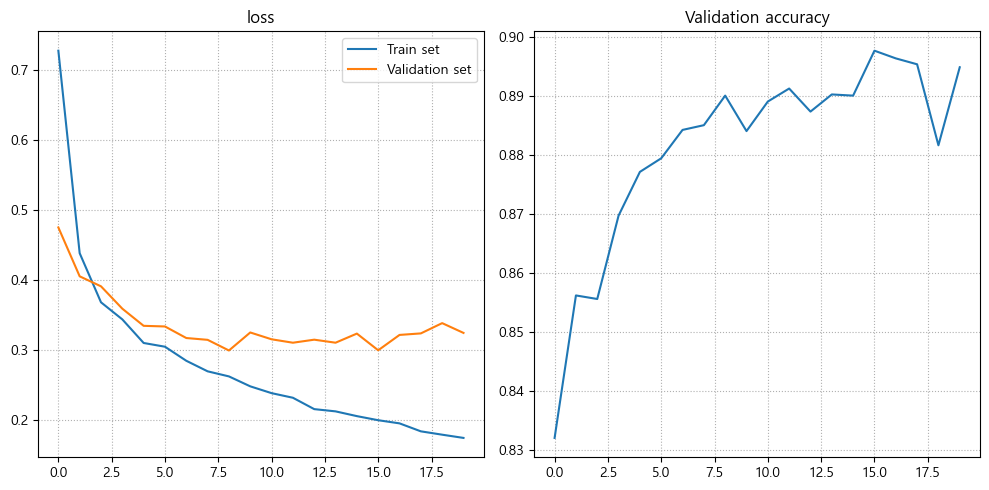

In [45]:
### 학습결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(20), train_losses, label="Train set")
plt.plot(range(20), valid_losses, label="Validation set")
plt.title("loss")
plt.grid(True, linestyle=":")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(20), valid_acc_list)
plt.title("Validation accuracy")
plt.grid(True, linestyle=":")

plt.tight_layout()
plt.show()

In [49]:
import numpy as np
np.argmin(valid_losses)  # epoch 8+1 에서 가장 적은 loss.

np.int64(8)

In [51]:
valid_losses[8]

0.29927670173347

### 모델 저장.
- 학습 도중 가장 좋은 성능의 모델이 나올 수있다.
- 모델을 저장할 경우 에폭 단위로 저장.
    1. 모든 에폭이 끝나고 모델을 저장.
    2. 가장 성능이 좋은 시점의 모델을 저장.
       - best score와 현재 epoch의 성능을 비교해서 성능 개선이 있으면 모델을 (덮어쓰기로) 저장.
### 조기 종료 (Early stopping)
- 학습 도중 성능개선이 없으면 중간 epoch에서 학습을 멈추도록 한다.
- epoch을 길게 잡아주고 성능이 개선될때 마다 저장, 특정 횟수의 에폭동안 성능 개선이 없으면 조기 종료하도록 구현.

In [56]:
lr = 0.001
epochs = 100

In [58]:
f_model = FashionMNISTModel().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(f_model.parameters(), lr=lr)

In [59]:
# train
import time

#########################################
# epoch 도중 성능이 개선되면 모델을 저장.
# 조기 종료
#########################################
save_path = "saved_models/fashion_mnist_model.pt"
## 현 시점에 가장 좋은 지표를 저장할 변수.
best_score = torch.inf  # validation loss 기준으로 저장 여부를 확인. loss가 낮아지면 성능이 개선.

# 조기종료 관련 변수
patience = 5  # 성능이 개선되는지를 몇 epoch 동안 기다려 볼지 지정. (보통 5 ~ 10 에폭 지정.)
trigger_cnt = 0 #성능이 개선되는지 몇 에폭째 기다리고 있는지 저장할 변수. (patience == trigger_cnt ->조기 종료)
#########################################

# epoch별 검증결과를 저장할 리스트
train_losses = []
valid_losses = []
valid_acc_list = []

s = time.time()
for epoch in range(epochs):
    ################## Train - train_loader #######################
    f_model.train() 
    train_loss = 0.0 # 현재 epoch의 train loss저장할 변수.
    for X_train, y_train in train_loader:
        #1. device로 이동
        X_train, y_train = X_train.to(device), y_train.to(device)
        #2. 추론
        pred = f_model(X_train) # f_model.forward(X_train) 호출
        #3. loss
        loss = loss_fn(pred, y_train)
        #4. gradient 계산
        loss.backward()
        #5. 파라미터들 update 
        optimizer.step()
        #6. 파라미터의 gradient값 초기화
        optimizer.zero_grad()
        # loss값을 train_loss 변수에 누적
        train_loss = train_loss + loss.item()  # train_loss += loss.item()
    train_loss = train_loss / len(train_loader) # 현재 epoch의 평균 train loss 를 계산.
    train_losses.append(train_loss)
    
    ################## 검증 - valid_loader #######################
    f_model.eval()
    # 검증결과 저장할 변수
    valid_loss = 0.0
    valid_acc = 0.0
    # weight 업데이트는 하지 않는다. 추론할 때 grad_fn을 구할 필요가 없다. 
    with torch.no_grad():
        for X_valid, y_valid in valid_loader:
            #1. device 로 이동
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            #2. 추론
            pred_valid = f_model(X_valid)
            #3. 검증작업 - loss, accuracy
            ## loss를 valid_loss에 누적
            valid_loss = valid_loss + loss_fn(pred_valid, y_valid).item()
            ## 정확도
            pred_class = pred_valid.argmax(dim=-1) # (256, 10) -> 10당 max값의 index를 조회 (256, )
            valid_acc = valid_acc + torch.sum(pred_class == y_valid).item()
        # 검증 결과 계산 (평균)
        valid_loss = valid_loss / len(valid_loader) # 1 epoch당 step수로 나누기.
        valid_acc = valid_acc / len(valid_loader.dataset) # 총 데이터 개수로 나누기.(맞은것개수/총개수)
        valid_losses.append(valid_loss)
        valid_acc_list.append(valid_acc)
        print_log = "[{}/{}] - train loss: {}, valid loss: {}, valid_acc: {}"
        print(print_log.format(epoch+1, epochs, train_loss, valid_loss, valid_acc))
    ################# 검증 완료 -> 모델 저장 ################
    if valid_loss < best_score: # 성능 개선이 되었으면.
        torch.save(f_model, save_path)
        # log 출력
        save_log = ">>>>>>>>>>> {} Epoch에서 모델 저장:  {}에서 {}로 loss가 개선되어 저장함"
        print(save_log.format(epoch+1, best_score, valid_loss))
        best_score = valid_loss # best score를 현재 에폭의 valid loss로 변경.
        
        # 성능개선이 되었으므로 trigger_cnt를 0으로 초기화.
        trigger_cnt = 0
    else: # 성능 개선이 안된 epoch
        trigger_cnt += 1 
        if patience == trigger_cnt: # 조기종료
            print(f"======={epoch+1}에서 조기종료함. {best_score}에서 개선이 안됨==========")
            break # 학습 반복 loop에서 빠져 나온다.

e = time.time()
print("학습에 걸린 시간(초):", e-s)

[1/100] - train loss: 0.7524227562623146, valid loss: 0.47817161679267883, valid_acc: 0.8297
>>>>>>>>>>> 1 Epoch에서 모델 저장:  inf에서 0.47817161679267883로 loss가 개선되어 저장함
[2/100] - train loss: 0.44005123713077643, valid loss: 0.3951769270002842, valid_acc: 0.858
>>>>>>>>>>> 2 Epoch에서 모델 저장:  0.47817161679267883에서 0.3951769270002842로 loss가 개선되어 저장함
[3/100] - train loss: 0.37218810602640495, valid loss: 0.38326835408806803, valid_acc: 0.8619
>>>>>>>>>>> 3 Epoch에서 모델 저장:  0.3951769270002842에서 0.38326835408806803로 loss가 개선되어 저장함
[4/100] - train loss: 0.3333956588537265, valid loss: 0.3367891974747181, valid_acc: 0.8767
>>>>>>>>>>> 4 Epoch에서 모델 저장:  0.38326835408806803에서 0.3367891974747181로 loss가 개선되어 저장함
[5/100] - train loss: 0.31216537478642586, valid loss: 0.32462094388902185, valid_acc: 0.8835
>>>>>>>>>>> 5 Epoch에서 모델 저장:  0.3367891974747181에서 0.32462094388902185로 loss가 개선되어 저장함
[6/100] - train loss: 0.29164263904094695, valid loss: 0.32831994332373143, valid_acc: 0.879
[7/100] - train loss: 

In [61]:
###### 저장된 모델을 이용해 최종평가
# test dataset
## 모델 load
best_model = torch.load(save_path)
## 1. eval 모드로 변경.
best_model.eval()
## 2. device 이동
best_model = best_model.to(device)

## 평가 결과를 저장할 변수
test_loss = 0.0
test_acc = 0.0
with torch.no_grad():
    for X_test, y_test in test_loader:
        # 1. device로 이동
        X_test, y_test = X_test.to(device), y_test.to(device)
        # 2. 추론
        pred_test = best_model(X_test)
        # 3. 평가 (loss, accuracy)
        ## loss (loss를 누적)
        test_loss = test_loss + loss_fn(pred_test, y_test).item()
        ## accuray (맞은 개수를 누적)
        pred_test_class = pred_test.argmax(dim=-1)
        test_acc = test_acc + torch.sum(y_test == pred_test_class).item()
    # 검증결과 계산(평균)
    test_loss = test_loss / len(test_loader)
    test_acc = test_acc / len(test_loader.dataset)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_3560\3958216491.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load(save_path)


In [62]:
print(test_loss, test_acc)

0.3139562178403139 0.8913


In [71]:
########## 새로운 데이터로 예측
# 테스트 셋에서 3개를 조회해서 추론
# testset[[0, 2, 3]] slicing/fancy indexing이 안됨. 
## 3개를 조회한 것을 저장할 변수
new_data = torch.empty(3, 1, 28, 28) # 1, 28, 28 짜리 세개를 저장할 빈 텐서를 생성.
new_data[0] = testset[0][0]
new_data[1] = testset[10][0]
new_data[2] = testset[100][0]

In [72]:
new_data.shape

torch.Size([3, 1, 28, 28])

In [85]:
p = best_model(new_data)
p.shape  # [3: 개수, 10: 클래스별 확률]

torch.Size([3, 10])

In [86]:
p_class = p.argmax(dim=-1)
p_class

tensor([9, 4, 3])

In [87]:
# testset.classes[3]

In [88]:
p.shape

torch.Size([3, 10])

In [89]:
p = nn.Softmax(dim=-1)(p)
p.max(dim=-1)

torch.return_types.max(
values=tensor([0.7900, 0.9175, 0.9951], grad_fn=<MaxBackward0>),
indices=tensor([9, 4, 3]))

In [79]:
p_prob = p.max(dim=-1).values
p_prob

tensor([5.3705, 6.0679, 8.0313], grad_fn=<MaxBackward0>)

In [80]:
p.max(dim=-1)

torch.return_types.max(
values=tensor([5.3705, 6.0679, 8.0313], grad_fn=<MaxBackward0>),
indices=tensor([9, 4, 3]))

In [90]:
def predict(model, X, device="cpu"):
    # model로 X 를 추정한 결과를 반환. (class_index, 정답의 확률)
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        X = X.to(device)
        pred = model(X)
        proba = nn.Softmax(dim=-1)(pred) # 모델 추론 값을 확률로 변환. #
        m = proba.max(dim=-1)
        return m.indices, m.values

In [91]:
result = predict(best_model, new_data, device=device)

In [92]:
result

(tensor([9, 4, 3]), tensor([0.7900, 0.9175, 0.9951]))

In [95]:
for class_index, prob in zip(*result):
    print(class_index.item(), testset.classes[class_index], prob.item(), sep=" - ")

9 - Ankle boot - 0.7899770140647888
4 - Coat - 0.917546272277832
3 - Dress - 0.9950917959213257


In [96]:
testset[0][1], testset[10][1], testset[100][1]

(9, 4, 3)

### 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

-   **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
-   위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
-   Feature
    -   종양에 대한 다양한 측정값들
-   Target의 class
    -   0 - malignant(악성종양)
    -   1 - benign(양성종양)


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [5]:
# Dataset
X, y = load_breast_cancer(return_X_y=True)
y = y.reshape(-1, 1)
# X.shape, y.shape, X.dtype
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

In [6]:
# 전처리
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# class name <-> class index
classes = np.array(["악성종양", "양성종양"])
class_to_idx = {"악성종양":0, "양성종양":1}

In [27]:
# Dataset
## 모델의 weight, bias -> float32. X, y는 weight, bias와 계산을 하게 되기 때문에 타입을 맞춰준다.
trainset = TensorDataset(
    torch.tensor(X_train_scaled, dtype=torch.float32),  
    torch.tensor(y_train, dtype=torch.float32)
)
testset = TensorDataset(
    torch.tensor(X_test_scaled, dtype=torch.float32), 
    torch.tensor(y_test, dtype=torch.float32)
)

In [28]:
trainset.classes = classes
trainset.class_to_idx = class_to_idx

In [29]:
# DataLoader
train_loader = DataLoader(trainset, batch_size=200, shuffle=True, drop_last=True)
test_loader = DataLoader(testset, batch_size=100)

In [30]:
######### 모델 정의
class BreastCancerModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(30, 32)
        self.lr2 = nn.Linear(32, 8)
        self.lr3 = nn.Linear(8, 1) # 출력 Layer 처리하는 함수. out_features=1 : positive일 확률.
        self.relu = nn.ReLU()
        self.logistic = nn.Sigmoid() # 입력값을 0 ~ 1 사이 실수로 반환. 

    def forward(self, X):
        X = self.lr1(X)
        X = self.relu(X)
        X = self.lr2(X)
        X = self.relu(X)
        # 출력 Layer
        output = self.lr3(X)
        output = self.logistic(output)
        return output

In [31]:
b_model = BreastCancerModel()
b_model

BreastCancerModel(
  (lr1): Linear(in_features=30, out_features=32, bias=True)
  (lr2): Linear(in_features=32, out_features=8, bias=True)
  (lr3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (logistic): Sigmoid()
)

In [32]:
from torchinfo import summary
summary(b_model, (10, 30), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
BreastCancerModel                        [10, 1]                   --
├─Linear: 1-1                            [10, 32]                  992
├─ReLU: 1-2                              [10, 32]                  --
├─Linear: 1-3                            [10, 8]                   264
├─ReLU: 1-4                              [10, 8]                   --
├─Linear: 1-5                            [10, 1]                   9
├─Sigmoid: 1-6                           [10, 1]                   --
Total params: 1,265
Trainable params: 1,265
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01

In [33]:
# dummy data로 출력
dummy_x = torch.randn(10, 30)
# dummy_x.shape
result = b_model(dummy_x)
# result.shape
result

tensor([[0.5502],
        [0.5136],
        [0.4955],
        [0.5309],
        [0.5072],
        [0.5206],
        [0.4998],
        [0.5054],
        [0.5360],
        [0.5289]], grad_fn=<SigmoidBackward0>)

In [34]:
(result > 0.5).type(torch.int32)  # bool -> int (True: 1, False: 0)

tensor([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=torch.int32)

In [37]:
lr = 0.001
epochs = 1000
######## 학습(train)
b_model = b_model.to(device)
optimizer = optim.Adam(b_model.parameters(), lr=lr)
loss_fn = nn.BCELoss()   # 함수이름: binary crossentropy

In [39]:
import time

### 모델 학습(train) 로직 작성
#### 검증 결과 -> train loss, valid_loss, valid_accuracy
### 모델 성능이 개선될 때 마다 저장.
### 조기종료 - 10 epoch 동안 성능 개선이 없으면 조기종료

save_path = "saved_models/bc_model.pt"
best_score = torch.inf   # validation loss 기준으로 저장/조기종료 여부 확인.
patience = 10
trigger_cnt = 0

train_losses, valid_losses, valid_acces = [], [], []

s = time.time()
for epoch in range(epochs):
    ################### train #######################
    b_model.train()
    train_loss = 0.0
    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        pred = b_model(X_train)  # positive일 확률
        loss = loss_fn(pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    ################### validation ##################
    b_model.eval()
    valid_loss = valid_acc = 0.0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            pred_test = b_model(X_test) # positive일 확률
            valid_loss += loss_fn(pred_test, y_test).item()
            #  이진 분류에서 accuracy
            valid_acc += torch.sum((pred_test > 0.5).type(torch.int32) == y_test).item()
        valid_loss /= len(test_loader)
        valid_acc /= len(test_loader.dataset)
        valid_losses.append(valid_loss)
        valid_acces.append(valid_acc)
    
    log_template = "[{:04d}/{}] train loss: {}, valid loss: {}, valid accuracy: {}"
    print(log_template.format(epoch+1, epochs, train_loss, valid_loss, valid_acc))
    # 모델 저장, 조기종료
    if valid_loss <  best_score: # 성능 개선
        print(f">>>>>> {epoch+1}에서 성능이 개선되어 저장합니다. {valid_loss}")
        torch.save(b_model, save_path)
        best_score = valid_loss
        trigger_cnt = 0
    else:
        trigger_cnt += 1
        if patience == trigger_cnt:
            print(f"{epoch+1} 에폭에서 조기종료 합니다. {best_score}에서 개선되지 않음.")
            break
    
e = time.time()
print("걸린시간(초):", e-s)

[0001/1000] train loss: 0.7162550091743469, valid loss: 0.7000104486942291, valid accuracy: 0.5944055944055944
>>>>>> 1에서 성능이 개선되어 저장합니다. 0.7000104486942291
[0002/1000] train loss: 0.7032418847084045, valid loss: 0.6897950768470764, valid accuracy: 0.6503496503496503
>>>>>> 2에서 성능이 개선되어 저장합니다. 0.6897950768470764
[0003/1000] train loss: 0.6921586692333221, valid loss: 0.6800262331962585, valid accuracy: 0.7062937062937062
>>>>>> 3에서 성능이 개선되어 저장합니다. 0.6800262331962585
[0004/1000] train loss: 0.6823038160800934, valid loss: 0.6705828905105591, valid accuracy: 0.7832167832167832
>>>>>> 4에서 성능이 개선되어 저장합니다. 0.6705828905105591
[0005/1000] train loss: 0.6715252995491028, valid loss: 0.6613221168518066, valid accuracy: 0.8321678321678322
>>>>>> 5에서 성능이 개선되어 저장합니다. 0.6613221168518066
[0006/1000] train loss: 0.6616750061511993, valid loss: 0.651933342218399, valid accuracy: 0.8881118881118881
>>>>>> 6에서 성능이 개선되어 저장합니다. 0.651933342218399
[0007/1000] train loss: 0.6498311758041382, valid loss: 0.64

In [ ]:
## loss, acc 시각화

In [40]:
best_model = torch.load(save_path)
best_model

C:\Users\Playdata\AppData\Local\Temp\ipykernel_9668\1033361258.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load(save_path)


BreastCancerModel(
  (lr1): Linear(in_features=30, out_features=32, bias=True)
  (lr2): Linear(in_features=32, out_features=8, bias=True)
  (lr3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (logistic): Sigmoid()
)

In [53]:
def predict_bc(model, X, device=device):
    # model로 X를 추론한 결과를 반환
    # label, 확률
    result = []
    with torch.no_grad():
        pred_proba = model(X)
        pred_class = (pred_proba > 0.5).type(torch.int32)
        for class_index, proba in zip(pred_class, pred_proba):
            # print(class_index, proba if class_index.item() == 1 else 1-proba)
            result.append((class_index.item(), proba if class_index.item() == 1 else 1-proba))
        return result

In [55]:
new_data = torch.tensor(X_test_scaled[:5], dtype=torch.float32)
# print(new_data.shape)
result = predict_bc(best_model, new_data, device)

In [56]:
result

[(1, tensor([0.9979])),
 (0, tensor([0.9998])),
 (0, tensor([0.9984])),
 (1, tensor([0.9997])),
 (0, tensor([0.9943]))]

# 모델 유형별 구현 정리

## 공통

-   Input layer(첫번째 Layer)의 in_features
    -   입력데이터의 feature(속성) 개수에 맞춰준다.
-   Hidden layer 수
    -   경험적(art)으로 정한다.
    -   Hidden layer에 Linear를 사용하는 경우 보통 feature 수를 줄여 나간다. (핵심특성들을 추출해나가는 과정의 개념.)

## 회귀 모델

-   output layer의 출력 unit개수(out_features)
    -   정답의 개수
    -   ex
        -   집값: 1
        -   아파트가격, 단독가격, 빌라가격: 3 => y의 개수에 맞춘다.
-   출력 Layer에 적용하는 activation 함수
    -   일반적으로 **None**
    -   값의 범위가 설정되 있고 그 범위의 값을 출력하는 함수가 있을 경우
        -   ex) 0 ~ 1: logistic(Sigmoid), -1 ~ 1: hyperbolic tangent(Tanh)
-   loss함수
    -   MSELoss
-   평가지표
    -   MSE, RMSE, R square($R^2$)

## 다중분류 모델

-   output layer의 unit 개수
    -   정답 class(고유값)의 개수
-   출력 Layer에 적용하는 activation 함수
    -   Softmax: 클래스별 확률을 출력
-   loss함수
    -   **categrocial crossentropy**
    -   파이토치 함수
        -   **CrossEntropyLoss** = NLLLoss(정답) + LogSoftmax(모델 예측값)
        -   **NLLLoss**
            -   정답을 OneHot Encoding 처리 후 Loss를 계산한다.
            -   입력으로 LogSoftmax 처리한 모델 예측값과 onehot encoding 안 된 정답을 받는다.
        -   **LogSoftmax**
            -   입력값에 Softmax 계산후 그 Log를 계산한다.
                -   NLLLoss의 모델 예측값 입력값으로 처리할 때 사용한다.

```python
pred = model(input)
loss1 = nn.NLLLoss(nn.LogSoftmax(dim=-1)(pred), y)
# or
loss2 = nn.CrossEntropyLoss()(pred, y)
```

## 이진분류 모델

-   output layer의 unit 개수
    -   1개 (positive일 확률)
-   출력 Layer에 적용하는 activation 함수
    -   Sigmoid(Logistic)
-   loss 함수
    -   **Binary crossentropy**
    -   파이토치 함수: **BCELoss**


In [2]:
import torch

y = torch.randn(3, 10)
y.shape

torch.Size([3, 10])

In [5]:
y.argmax(-1)

tensor([1, 3, 0])

In [6]:
y.max(-1)

torch.return_types.max(
values=tensor([0.8207, 3.2270, 1.1005]),
indices=tensor([1, 3, 0]))

In [8]:
y.sum(-1)

tensor([-1.1755, -0.5662,  0.4015])

In [10]:
y

tensor([[ 0.3004,  0.8207,  0.3793, -1.5469, -1.1062,  0.4135, -0.7181,  0.4332,
         -0.1682,  0.0168],
        [ 0.0907, -0.2183, -2.8074,  3.2270, -1.3272, -0.7209, -0.9432,  0.4112,
          0.1030,  1.6189],
        [ 1.1005, -1.6897, -0.0264,  0.6965,  0.8138, -0.8811,  0.3088,  0.0828,
          0.3606, -0.3642]])

In [11]:
y.shape

torch.Size([3, 10])

In [13]:
f = torch.nn.Softmax(dim=1)
proba = f(y)
proba.shape

torch.Size([3, 10])

In [15]:
print(proba)
proba.sum(-1)


tensor([[0.1224, 0.2060, 0.1325, 0.0193, 0.0300, 0.1371, 0.0442, 0.1398, 0.0766,
         0.0922],
        [0.0304, 0.0223, 0.0017, 0.7007, 0.0074, 0.0135, 0.0108, 0.0419, 0.0308,
         0.1403],
        [0.2240, 0.0138, 0.0726, 0.1495, 0.1682, 0.0309, 0.1015, 0.0810, 0.1069,
         0.0518]])


tensor([1.0000, 1.0000, 1.0000])